In [1]:
from pyclustering.cluster.kmedoids import kmedoids
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Datasets/RockData.csv')
df_selected = df[['popularity', 'danceability']].values


In [4]:
initial_medoids = [0, 1, 2, 3]

kmedoids_instance = kmedoids(df_selected, initial_medoids)
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()

df['distance_from_origin'] = np.sqrt(df['popularity']**2 + df['danceability']**2)

farthest_song = df.loc[df['distance_from_origin'].idxmax()]
nearest_song = df.loc[df['distance_from_origin'].idxmin()]



print("Farthest Song:")
print(f"Name: {farthest_song['name']}, Artist: {farthest_song['artist']}, Distance: {farthest_song['distance_from_origin']}\n")

print("Nearest Song:")
print(f"Name: {nearest_song['name']}, Artist: {nearest_song['artist']}, Distance: {nearest_song['distance_from_origin']}\n")


Farthest Song:
Name: Jingle Bell Rock, Artist: Bobby Helms, Distance: 84.00338395564788

Nearest Song:
Name: You Wreck Me - Commentary, Artist: Various Artists, Distance: 0.0



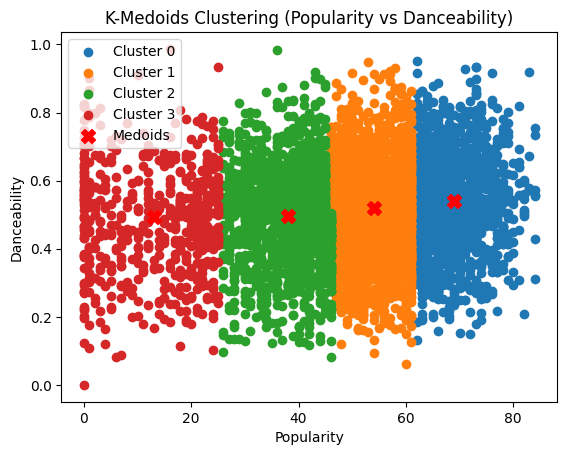

In [26]:
for cluster_id, cluster in enumerate(clusters):
    cluster_points = df_selected[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

# Plot the medoids
medoids = df_selected[kmedoids_instance.get_medoids()]
plt.scatter(medoids[:, 0], medoids[:, 1], color='red', marker='X', s=100, label='Medoids')

# Adding labels and title
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('K-Medoids Clustering (Popularity vs Danceability)')
plt.legend()

# Show the plot
plt.show()